# Introduction to Kernel Customer Segmentation in Python

## Task 4: Kernel Principal Component Analysis
Let's go over some [KPCA theory](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), and see see if it works better than standard PCA.

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import KernelPCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [5]:
df = pd.read_csv('Data/data_processed.csv', index_col=0)
data = np.load('Data/training_data.npy')

## Polynomial Function

In [3]:
kpca = KernelPCA(n_components=2, kernel='rbf', degree=2)
res_kpca_poly = kpca.fit_transform(data)

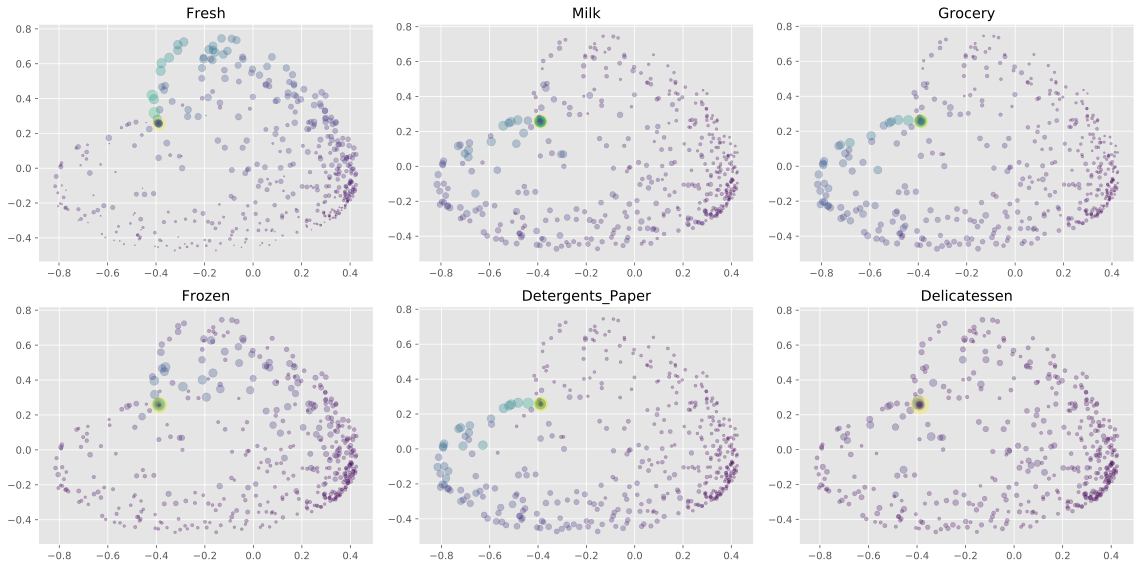

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.3, 
               c=df[feature], cmap=cols)
    ax.set_title(feature)
#    ax.legend()
plt.tight_layout()

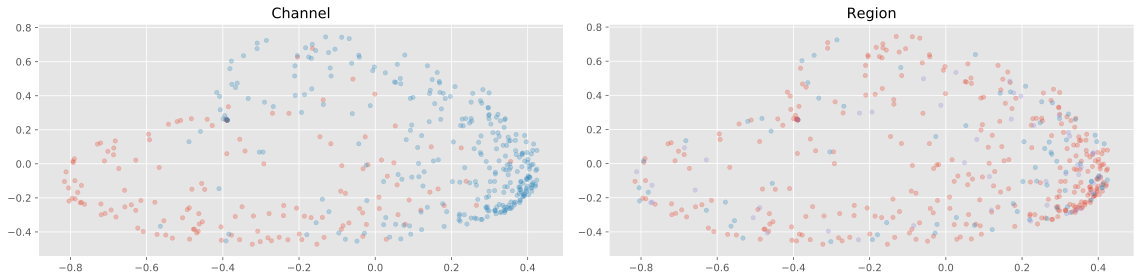

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_poly[df[feature]==unique_val, 0], res_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Radial Basis Function

In [9]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05) #gamma = 0.1
res_kpca_rbf = kpca.fit_transform(data)

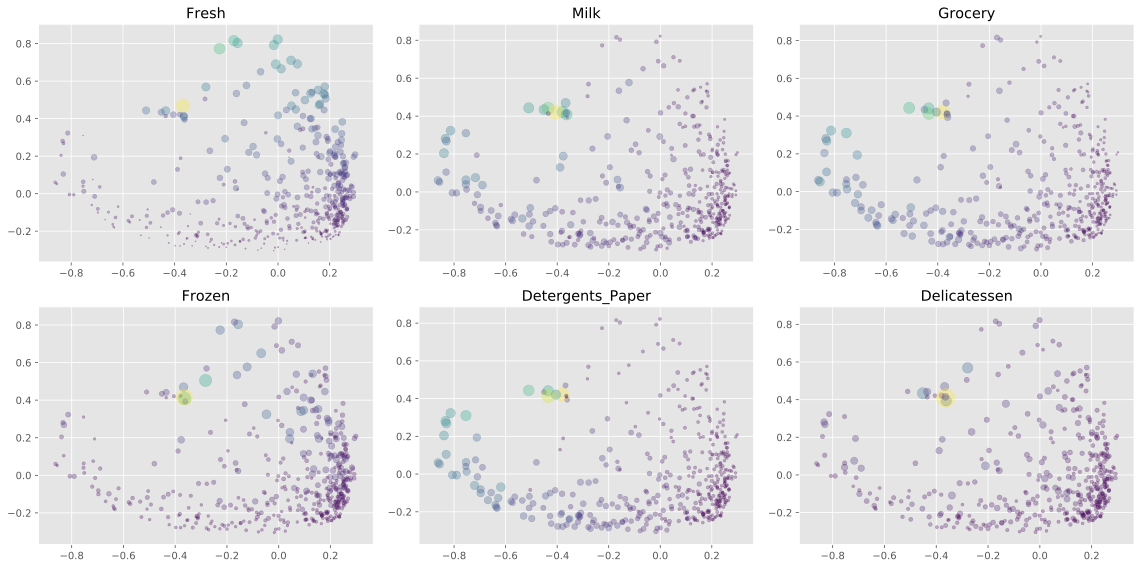

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

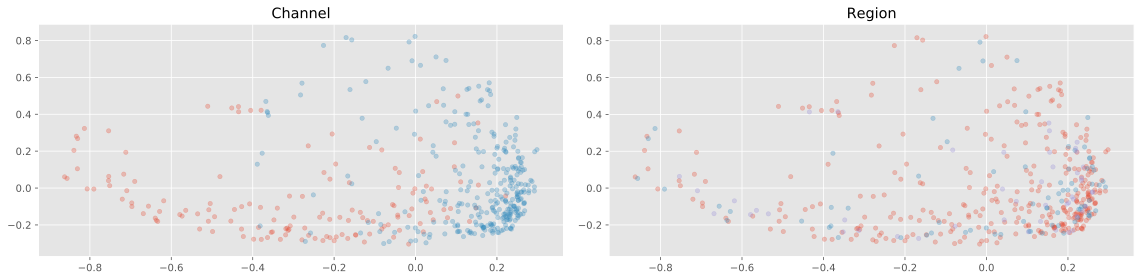

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_rbf[df[feature]==unique_val, 0], res_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Cosine Function

In [12]:
kpca = KernelPCA(n_components=2, kernel='cosine')
res_kpca_cos = kpca.fit_transform(data)

## How to read the PCA Scatter Plot
#### Follow the shape from small to big, see the big and small circles are sepearable.
### Also the color of small circlesare darker and the color of big circles are yellow
### Yellow big circles mean high vlaue customers
### If the color are also seperated, then it is good

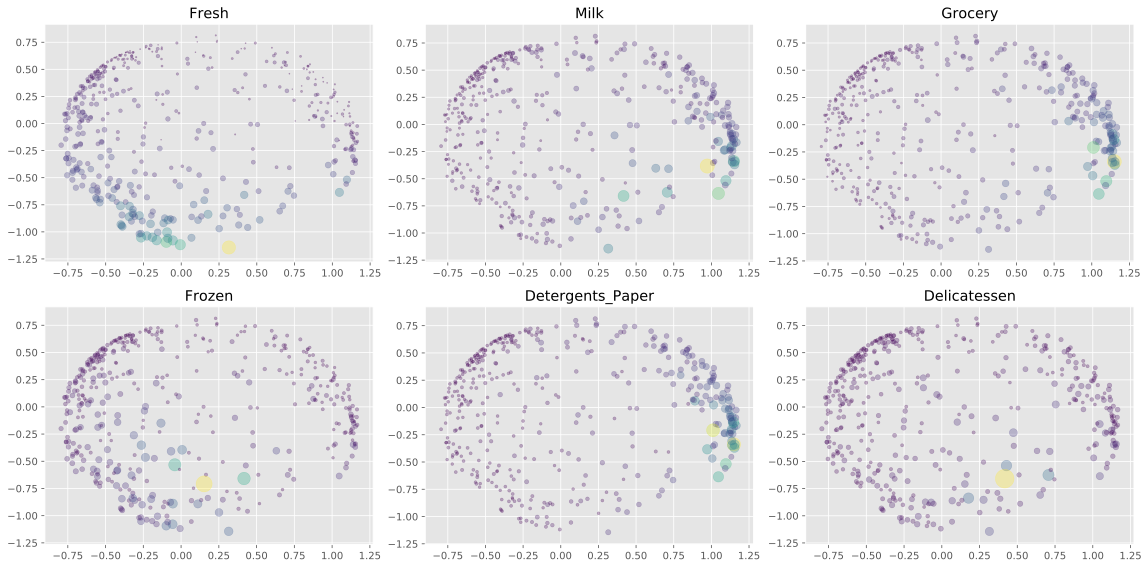

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

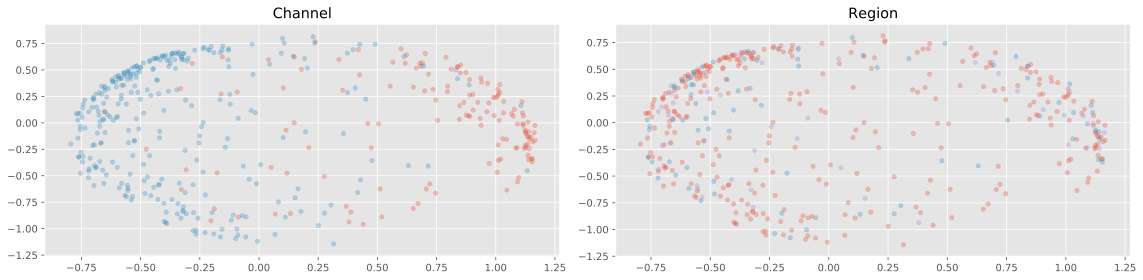

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(res_kpca_cos[df[feature]==unique_val, 0], res_kpca_cos[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Append to DataFrame

In [51]:
df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3  HoReCa  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185

In [52]:
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

df['x_kpca_poly'] = res_kpca_poly[:, 0]
df['y_kpca_poly'] = res_kpca_poly[:, 1]

df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [53]:
df.to_csv('Data/data_with_latent.csv')